In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.rcParams['font.family'] = 'sans-serif'
import os 
from dispersant_screener.definitions import FEATURES

DATADIR = '../data'

In [2]:
df_full_factorial_feat = pd.read_csv(os.path.join(DATADIR, 'new_features_full_random.csv'))
X_full_random = pd.read_csv(os.path.join(DATADIR, 'X_full_random.csv'))
a2 = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values
deltaGMax = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values
gibbs = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_deltaG.csv'))['deltaGmin'].values
gibbs_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['deltaGmax'].values
force_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_fit2.csv'))['F_repel_max'].values
rg = pd.read_csv(os.path.join(DATADIR, 'rg_results.csv'))['Rg'].values
y = np.hstack([
    rg.reshape(-1, 1),
    gibbs.reshape(-1, 1) * (-1),
    gibbs_max.reshape(-1, 1),
])
assert len(df_full_factorial_feat) == len(a2) == len(gibbs) == len(y)


In [3]:
df_full_factorial_feat['smiles'] = X_full_random['smiles']

In [4]:
df_full_factorial_feat['rg'] = rg
df_full_factorial_feat['gibbs'] = gibbs
df_full_factorial_feat['gibbs_max'] = gibbs_max

In [5]:
df_full_factorial_feat[['[W]', '[Tr]', '[Ta]', '[R]', 'rg', 'gibbs', 'gibbs_max']][:100]

,[W],[Tr],[Ta],[R],rg,gibbs,gibbs_max
0,0.25,0.250000,0.250000,0.250000,1.474050,-7.535286,1.420749
1,0.25,0.250000,0.250000,0.250000,1.457608,-7.270527,1.433393
2,0.25,0.250000,0.250000,0.250000,1.464777,-6.416311,1.885474
3,0.25,0.250000,0.250000,0.250000,1.472556,-6.684816,2.339672
4,0.25,0.250000,0.250000,0.250000,1.463182,-6.606492,1.812410
...,...,...,...,...,...,...,...
95,0.40,0.133333,0.333333,0.133333,2.263436,-9.388334,1.883930
96,0.40,0.133333,0.333333,0.133333,2.238902,-6.850659,2.431936
97,0.40,0.133333,0.333333,0.133333,2.247506,-7.988934,2.961641
98,0.40,0.133333,0.333333,0.133333,2.241701,-7.406052,1.931609


In [6]:
compositions = np.unique(df_full_factorial_feat[['[W]', '[Tr]', '[Ta]', '[R]']].values, axis=0)

In [7]:
rg_var = []
gibbs_var = []
gibbs_max_var = []

rg_means = []
gibbs_means = []
gibbs_max_means = []

for composition in compositions: 
    df_subset = df_full_factorial_feat[(df_full_factorial_feat[['[W]', '[Tr]', '[Ta]', '[R]']]==composition).all(axis=1)]
    
    rg_var.append(df_subset['rg'].std())
    rg_means.append(df_subset['rg'].mean())
    
    gibbs_var.append(df_subset['gibbs'].std())
    gibbs_means.append(df_subset['gibbs'].mean())
    
    gibbs_max_var.append(df_subset['gibbs_max'].std())
    t.append(df_subset['gibbs_max'].mean())
    

/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/Users/kevinmaikjablonka/opt/miniconda3/envs/dispersant_basf/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


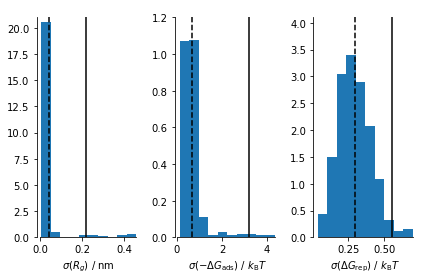

In [10]:
fig, ax = plt.subplots(1,3)
ax[0].hist(rg_var, density=True)
ax[1].hist(gibbs_var, density=True)
ax[2].hist(gibbs_max_var, density=True)

ax[0].vlines(np.std(rg_means), 0, 21)
ax[1].vlines(np.std(gibbs_means), 0, 1.2)
ax[2].vlines(np.std(gibbs_max_means), 0, 4.1)

ax[0].vlines(np.mean(rg_var), 0, 21, ls='--')
ax[1].vlines(np.mean(gibbs_var), 0, 1.2, ls='--')
ax[2].vlines(np.mean(gibbs_max_var), 0, 4.1, ls='--')


ax[0].set_xlabel(r'$\sigma(R_g)$ / nm')
ax[1].set_xlabel(r'$\sigma(-\Delta G_\mathrm{ads})$ / $k_\mathrm{B}T$')
ax[2].set_xlabel(r'$\sigma(\Delta G_\mathrm{rep})$ / $k_\mathrm{B}T$')


for a in ax: 
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)
    a.spines['right'].set_visible(False)
    a.spines['top'].set_visible(False)

fig.tight_layout()
fig.savefig('var_composition_sequence.pdf', bbox_inches='tight')

In [8]:
np.std(rg_means)

0.21569330351957344

In [9]:
np.mean(rg_var)

0.041379453391634215

In [10]:
from scipy import stats

In [11]:
stats.ttest_1samp(rg_var, np.std(rg_means))

Ttest_1sampResult(statistic=-59.81812175860581, pvalue=3.883930626003455e-253)

In [12]:
stats.ttest_1samp(gibbs_var, np.std(gibbs_means))

Ttest_1sampResult(statistic=-113.8456225239555, pvalue=0.0)

In [13]:
stats.ttest_1samp(gibbs_max_var, np.std(gibbs_max_means))

Ttest_1sampResult(statistic=-55.74326628227384, pvalue=9.925548437471486e-238)

In [14]:
stats.wilcoxon(rg_var, np.std(rg_means))

TypeError: len() of unsized object